# Contenidos

* [Métodos de Euler, Euler implícito y Heun](#euler)
* [EDOs de orden mayor que 1 y sistemas de ecuaciones](#edos)
* [Métodos de orden superior](#Métodos-de-orden-superior):
 * [Método de Taylor](#Método-de-Taylor)
 * [Métodos de Runge-Kutta](#Método-de-Runge-Kutta)
 * [Sistemas de ecuaciones](#Sistemas-de-ecuaciones)
* [Métodos multipaso](#multipaso):
 * [Método de Adams-Bashforth](#Método-de-Adams-Bashforth)
 * [Método de Adams-Moulton](#Método-de-Adams-Moulton)
 * [Método Predictor-Corrector](#Método-Predictor-Corrector)
* [Problemas de valores frontera](#Problemas-de-valores-frontera):
 * [Métodos de tiro](#Métodos-de-tiro)
 * [Diferencias finitas](#Diferencias-finitas)
 * [Problema de Dirichlet](#Problema-de-Dirichlet)

<a id="euler-heun"></a>

# Métodos de Euler, Euler implícito y Heun

En esta práctica implementaremos y compararemos estos tres métodos. Vamos a considerar el problema de valor inicial, $$x'=t x(1-x),\quad x(0)=0.5$$ 
El objetivo será aproximar la solución en $t=10$.

In [59]:
t = var('t')
x = function('x')(t)
desolve(diff(x,t) - t*x*(1-x), x, ics=[0,1/2])

-log(x(t) - 1) + log(x(t)) == -I*pi + 1/2*t^2 - log(2) - log(1/2)

In [60]:
solve(log(x/(x-1)) == -I*pi + 1/2*t^2 - log(2) - log(1/2), x)

[x(t) == e^(1/2*t^2)/(e^(1/2*t^2) + 1)]

In [61]:
xs(t) = e^(1/2*t^2)/(e^(1/2*t^2) + 1)

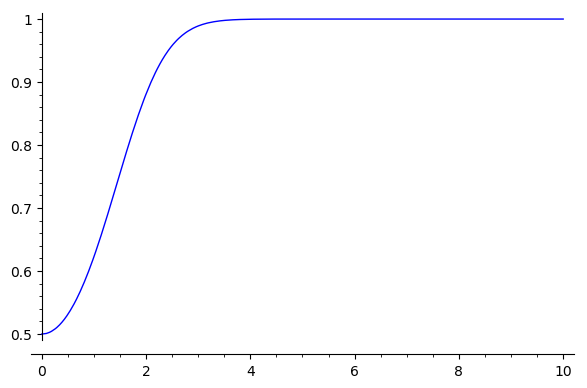

In [62]:
plot(xs(t),(t,0,10))

 1. Implementar el método de Euler y aplicarlo al PVI ejemplo 1 con $1$, $5$, $10$ y $100$ pasos. Representar en una gráfica las aproximaciones obtenidas y la solución exacta.

In [63]:
# h = (b-a)/n, t_0 = a, t_i = t_0 + i*h
# x_0 = eta, x_{i+1} = x_i + h * f(t_i,x_i) 

In [64]:
f(t,x) = t*x*(1-x)
t0 = a = 0
t1 = b = 10
x0 = eta = 0.5
n = 1

In [65]:
def euler(a,b,eta,n,f):
    ti = (n+1)*[0]
    xi = (n+1)*[0]
    h  = (b-a)/n
    ti[0] = a
    xi[0] = eta
    for i in [1..n]:
        ti[i] = ti[i-1] + h
        xi[i] = xi[i-1] + h*f(ti[i-1],xi[i-1])
    return( zip(ti,xi) )

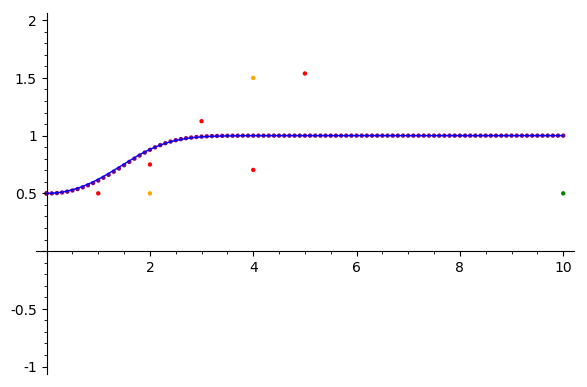

In [66]:
e1 = point(euler(a,b,eta,1,f),color='green')
e5 = point(euler(a,b,eta,5,f),color='orange')
e10 = point(euler(a,b,eta,10,f),color='red')
e100 = point(euler(a,b,eta,100,f),color='purple')
plot(xs(t),(t,0,10), ymin=-1, ymax=2) + e1 + e5 + e10 + e100

2. Implementar el método de Euler implícito y el método de Heun y aplicarlo al PVI ejemplo con $1$, $5$, $10$ y $100$ pasos. Representar en una gráfica las aproximaciones obtenidas y la solución exacta. Para implementar el método de Euler implícito, crea antes una función que aplique el método del punto fijo. 

In [67]:
def heun(a,b,eta,n,f):
    ti = (n+1)*[0]
    xi = (n+1)*[0]
    h  = (b-a)/n
    ti[0] = a
    xi[0] = eta
    for i in [0..n-1]:
        ti[i+1] = ti[i] + h
        xi[i+1] = xi[i] + h*( f(ti[i],xi[i]) + f(ti[i+1],xi[i]+h*f(ti[i],xi[i])) )/2
    return( zip(ti,xi) )

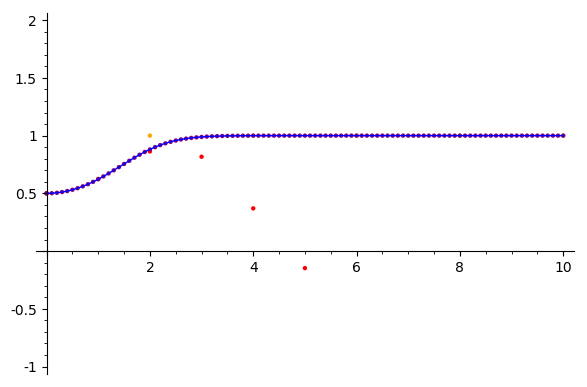

In [68]:
e1 = point(heun(a,b,eta,1,f),color='green')
e5 = point(heun(a,b,eta,5,f),color='orange')
e10 = point(heun(a,b,eta,10,f),color='red')
e100 = point(heun(a,b,eta,100,f),color='purple')
plot(xs(t),(t,0,10), ymin=-1, ymax=2) + e1 + e5 + e10 + e100

In [69]:
# x = F(x)
# x0, x_i = F(x_{i-1}) i=1..n

In [70]:
def punto_fijo(F,x0,n):
    
    #if n==0:
    #    return x0
    #return F(punto_fijo(F,x0,n-1))
    
    xi = x0
    for i in [1..n]:
        xi = F(xi)
    return xi

In [71]:
def euler_implicito(a,b,eta,n,f):
    ti = (n+1)*[0]
    xi = (n+1)*[0]
    h  = (b-a)/n
    ti[0] = a
    xi[0] = eta
    for i in [0..n-1]:
        ti[i+1] = ti[i] + h
        F(x) = xi[i] + h*f(ti[i+1],x)
        xi[i+1] = punto_fijo(F,xi[i],10)
    return( zip(ti,xi) )

In [72]:
# x_{i+1} = x_i + h * f(t_{i+1},x_{i+1})
# x       = x_i + h * f(t_{i+1}, x )
# x       = F(x)
# x aprox F(F(F(F(F(F(F(x_i)))))))

In [73]:
(a,b,eta,10,f)

(0, 10, 0.500000000000000, 10, (t, x) |--> -t*(x - 1)*x)

In [74]:
list(euler_implicito(a,b,eta,10,f))

[(0, 0.500000000000000),
 (1, 0.707090384946752),
 (2, 0.556330827918082),
 (3, -1.32468757949514e117),
 (4, -8.94455177912877e120548),
 (5, -2.76887220891375e123442841),
 (6, -9.26640672593327e126405470432),
 (7, -4.49289329584067e129439201724222),
 (8, -1.11631720737096e132545742565604920),
 (9, -infinity),
 (10, -infinity)]

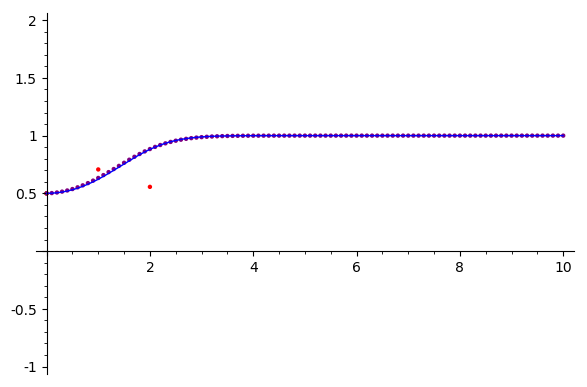

In [75]:
e1 = point(euler_implicito(a,b,eta,1,f),color='green')
e5 = point(euler_implicito(a,b,eta,5,f),color='orange')
e10 = point(euler_implicito(a,b,eta,10,f),color='red')
e100 = point(euler_implicito(a,b,eta,100,f),color='purple')
plot(xs(t),(t,0,10), ymin=-1, ymax=2) + e1 + e5 + e10 + e100

3. Representar en una gráfica para cada método los errores cometidos al aproximar con pasos $1$, $2$, $4$, $8$, $16$, $32$, $64$, $128$.

In [77]:
# Creamos una lista y tomamos el último elemento
# que es el que está marcado con [-1]
def ultimo(lista_pares_zip):
    return list(lista_pares_zip)[-1][1]

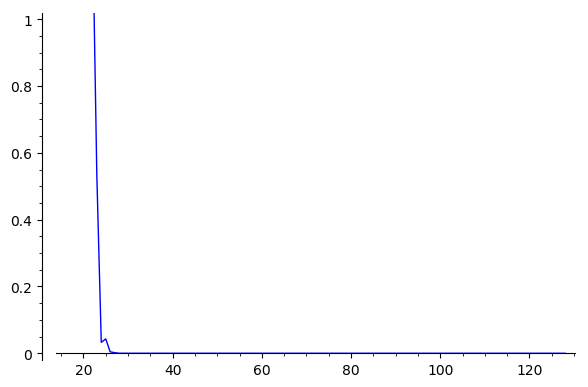

In [94]:
line([(k,abs( ultimo( euler(t0,t1,x0,k,f))-xs(10.) ) ) for k in [16..128]],ymax = 1)

In [96]:
[abs( ultimo( euler(t0,t1,x0,k,f)) -xs(10.) )  for k in [16..128]]

[1.09221371703967e8,
 5.38794492718741e7,
 5.62488499800699,
 14.6285332206478,
 1.45074843581840,
 2.45630904771657,
 1.32611528627871,
 0.533139102095514,
 0.0325995333567969,
 0.0430868573206689,
 0.00422450891219417,
 0.00186210750291260,
 0.000144824580734171,
 0.0000760427556694143,
 7.44547473563451e-7,
 2.37228906319054e-6,
 3.10052713947684e-7,
 2.49912077698866e-8,
 1.23806707108542e-8,
 1.45696010811491e-9,
 4.06095157501341e-11,
 4.23421298023641e-11,
 7.71804842258916e-12,
 7.24975635080227e-13,
 0.000000000000000,
 1.44328993201270e-14,
 3.55271367880050e-15,
 3.33066907387547e-16,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.00000000000000

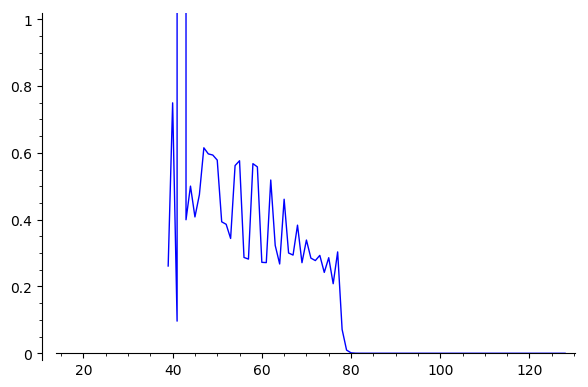

In [98]:
line([(k,abs( ultimo( euler_implicito(t0,t1,x0,k,f))-xs(10.) ) ) for k in [16..128]],ymax = 1)

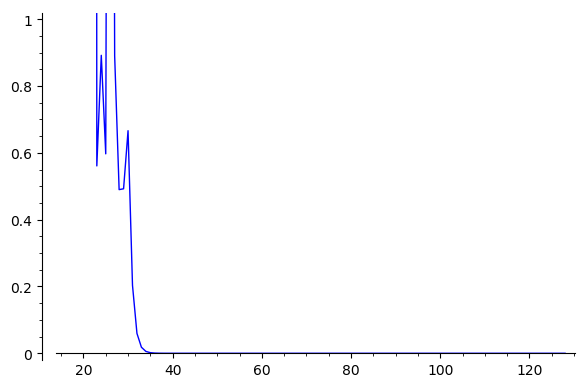

In [100]:
line([(k,abs( ultimo( heun(t0,t1,x0,k,f))-xs(10.) ) ) for k in [16..128]],ymax = 1)

<a id="edos"></a>

# EDOs de orden mayor que 1 y sistemas de ecuaciones

El objetivo de esta práctica es aplicar los métodos numéricos vistos en la práctica anterior a ecuaciones diferenciales de orden dos o superior o a sistemas de ecuaciones. Recordemos que toda ecuación de orden mayor que uno se puede escribir como un sistema de ecuaciones introduciendo funciones incógnita adicionales que sustituyan a las derivadas. Por ejemplo, el PVI

$$x''+x+1=0,\quad x(0)=1,\quad x'(0)=0,$$

es equivalente al PVI de primer orden

$$x'=y,\quad y'=-x-1,\quad x(0)=1,\quad y(0)=0.$$

1. Consideremos el PVI 

$$x''+x^2-1=0,\quad x(0)=1,\quad x'(0)=0.$$

a) Obtener un PVI de primer orden equivalente. 

b) Calcular sus puntos críticos. 

c) Dibujar el campo de pendientes

d) Calcular la parte lineal del sistema en cada uno de los puntos críticos.

In [71]:
X(x,y) = [ y,1-x^2]
x0 = vector(RDF,[1,0])

In [72]:
solve([f==0 for f in X(x,y)],x,y)

[[x == 1, y == 0], [x == -1, y == 0]]

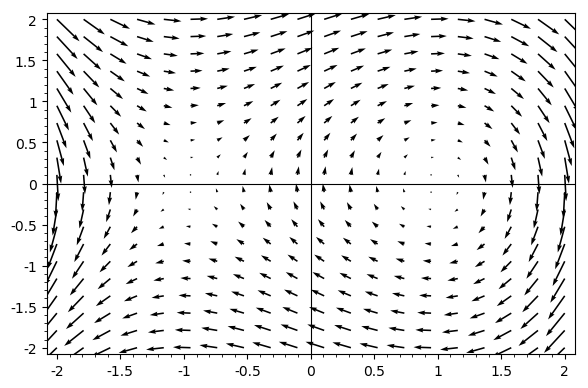

In [73]:
plot_vector_field(X(x,y), (x,-2,2), (y,-2,2))

In [74]:
[f.expand() for f in X(1+x,y)]

[y, -x^2 - 2*x]

In [75]:
A1 = jacobian(X,(x,y))(1,0)
A2 = jacobian(X,(x,y))(-1,0)

In [76]:
A1.eigenvalues()

[-I*sqrt(2), I*sqrt(2)]

In [77]:
A2.eigenvalues()

[-sqrt(2), sqrt(2)]

2. Consideremos ahora el PVI lineal

$$ x'= a x + b y,\quad y'=c x + d y,\quad x(0)=1,\quad y(0)=0.$$

a) Fijados $a=0,b=1,c=-1,d=0$, aplicar el método de Euler y el método de Heun, con 50 y con 100 pasos, para aproximar la solución en $t=4\pi$. Comparar con la solución exacta $x(t)=\cos(t)$, $y(t)=\sin(t)$. 

b) Sabemos que el periodo de las soluciones para los valores de los parámetros anteriores es de $2\pi$. Vamos a tratar de aproximarlo numéricamente y comparar los valores obtenidos con el valor de referencia. Para ello, calcula el valor de $t$ para el que la solución "atraviesa" la el semieje $x$ positivo. 

c) Elige cuatro valores $a,b,c,d$ (tales que $ac-bd\neq 0$) y compara las soluciones exactas de la ecuación con las obtenidas mediante los métodos numéricos. 

d) Aplica los métodos numéricos al PVI del ejercicio 1, partiendo de $(0,0)$ y de $(-0.5,0)$.

In [78]:
a=0
b=1
c=-1
d=0
X(x,y)=[a*x+b*y,c*x+d*y]
t0 = 0.
x0 = [1.,0.]
t1 = 4*pi.n()
show(X)

(x, y) |--> (y, -x)

In [79]:
def euler(X,t0,x0,t1,n):
    tk = (n+1)*[0]
    xk = (n+1)*[ [0.,0.] ]
    h = (t1-t0)/n
    tk[0] = t0
    xk[0] = vector(x0)
    for k in [0..n-1]:
        xk[k+1] = vector(xk[k]) + h*vector(X(*xk[k]))
        tk[k+1] = tk[k] + h
    return zip(tk,xk)

In [80]:
def heun(X,t0,x0,t1,n):
    tk = (n+1)*[0]
    xk = (n+1)*[ [0.,0.] ]
    h = (t1-t0)/n
    tk[0] = t0
    xk[0] = vector(x0)
    for k in [0..n-1]:
        xaux = vector(xk[k]) + h*vector(X(*xk[k]))
        xk[k+1] = vector(xk[k]) + h*(vector(X(*xk[k])) + vector(X(*xaux)))/2
        tk[k+1] = tk[k] + h
    return zip(tk,xk)

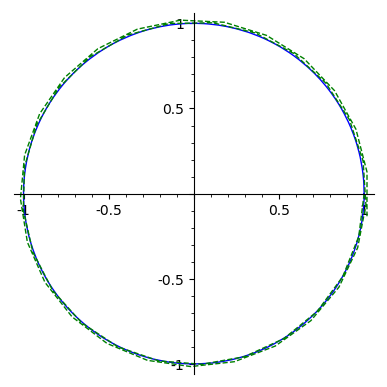

In [81]:
var('t')
d1 = line(list(zip(*heun(X,t0,x0,t1,50)))[1],color='green',linestyle='--')
parametric_plot((cos(t),sin(t)),(t,0,2*pi)) + d1

In [82]:
X(x,y) = [ y,1-x^2]
x0 = vector(RDF,[0,0])
vf = plot_vector_field(X(x,y), (x,-2,2), (y,-2,2))

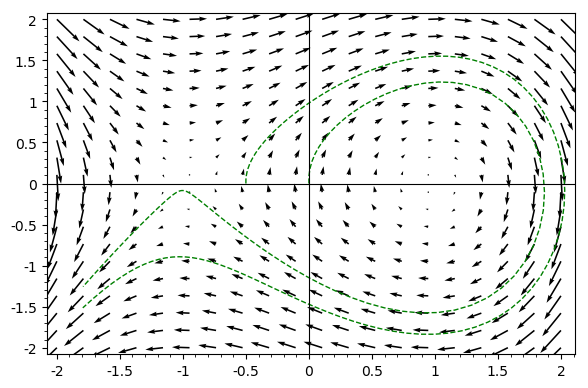

In [83]:
var('t')
d1 = line(list(zip(*euler(X,t0,[0,0],8.94,100)))[1],color='green',linestyle='--')
d2 = line(list(zip(*euler(X,t0,[-0.5,0],6,100)))[1],color='green',linestyle='--')
vf + d1 + d2

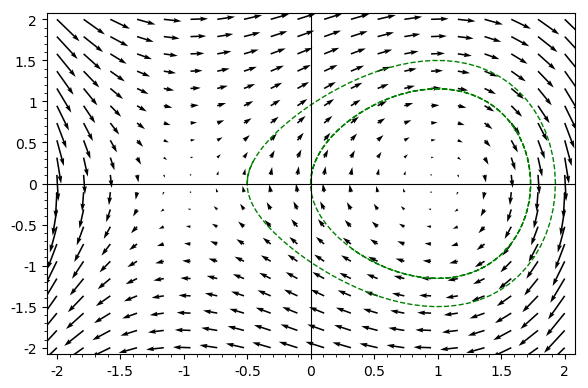

In [84]:
var('t')
d1 = line(list(zip(*heun(X,t0,[0,0],8.94,100)))[1],color='green',linestyle='--')
d2 = line(list(zip(*heun(X,t0,[-0.5,0],6,100)))[1],color='green',linestyle='--')
vf + d1 + d2

In [85]:
def heun_tpaso(X,x0,h,n=1000):
    xk = [vector(RDF,x0)]
    for k in [0..n-1]:
        xaux = vector(xk[k]) + h*vector(X(*xk[k]))
        xk += [ vector(xk[k]) + h*(vector(X(*xk[k])) + vector(X(*xaux)))/2 ]
        if xk[-1][1]>0 and xk[-2][1]<0.:
            return k*h

In [86]:
h=0.01
tpaso = heun_tpaso(X,[0.,0.],h)
tpaso,int(tpaso/h)

(4.88000000000000, 488)

In [87]:
tk,pk = zip(*heun(X,t0,[0.,0.],tpaso,int(tpaso/h)))

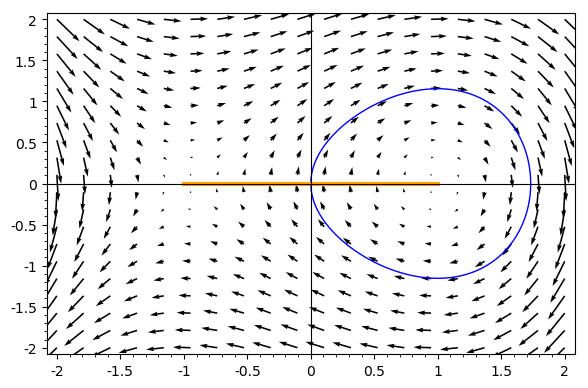

In [88]:
vf + line(pk) + line([(-1,0),(1,0)],color='orange',thickness=3)

In [92]:
[heun_tpaso(X,[k,0.],0.01) for k in [-0.95,-0.9..0.95]]

[8.74000000000000,
 7.77000000000000,
 7.22000000000000,
 6.83000000000000,
 6.53000000000000,
 6.29000000000000,
 6.09000000000000,
 5.92000000000000,
 5.77000000000000,
 5.64000000000000,
 5.53000000000000,
 5.43000000000000,
 5.33000000000000,
 5.25000000000000,
 5.17000000000000,
 5.10000000000000,
 5.04000000000000,
 4.98000000000000,
 4.93000000000000,
 4.88000000000000,
 4.83000000000000,
 4.79000000000000,
 4.75000000000000,
 4.71000000000000,
 4.68000000000000,
 4.64000000000000,
 4.62000000000000,
 4.59000000000000,
 4.57000000000000,
 4.54000000000000,
 4.52000000000000,
 4.51000000000000,
 4.49000000000000,
 4.48000000000000,
 4.46000000000000,
 4.46000000000000,
 4.45000000000000,
 4.44000000000000,
 4.44000000000000]

In [103]:
tiempos = [(k,heun_tpaso(X,[k,0.],0.01)) for k in [-0.95,-0.9..0.95]]

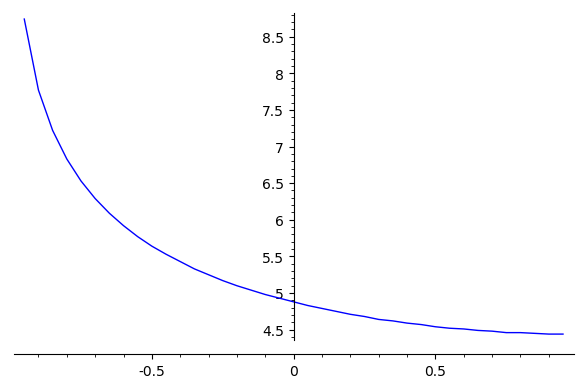

In [105]:
line(tiempos)

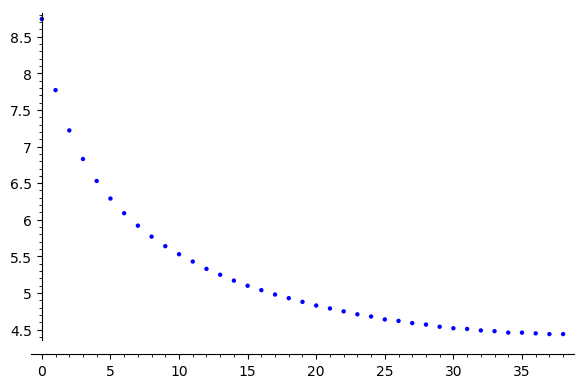

In [102]:
list_plot([heun_tpaso(X,[k,0.],0.01) for k in [-0.95,-0.9..0.95]])

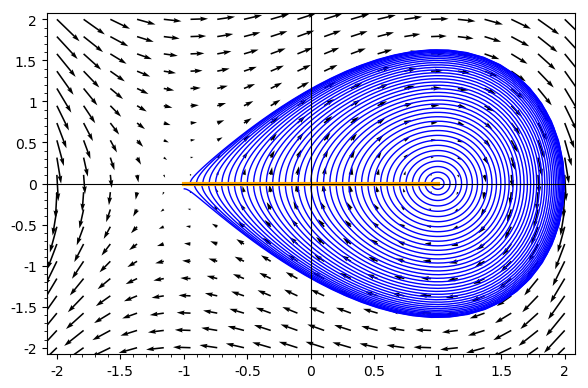

In [110]:
orbitas = []
for k,tp in tiempos:
    tk , pk = zip(*heun(X,t0,[k,0.],tp,100))
    orbitas += [line(pk)]
vf + sum(orbitas) + line([(-1,0),(1,0)],color='orange',thickness=3)

# Métodos de orden superior

## Método de Taylor

1. Crear una función que reciba una función f y un valor k y devuelva la derivada total k-ésima de f.
2. Programar el método de Taylor.
3. Aplicar 10 pasos del método de Taylor de orden 3 al problema de valor inicial $$x' = t(1-x^2),\quad x(0)=0.$$ Aproximar la solución en distintos valores de $t$ (2, 4, 6) y comparar los resultados obtenidos con el método de Euler.
4. Comparar el error cometido al estimar $x(2)$ para la solución del PVI $$x' = x,\quad x(0)=1$$ con los métodos de Taylor de orden $1,2,3,4,5$ y  número de pasos entre 10 y 100.

In [1]:
# 3
var('t,x')
f = t*(1-x^2)

In [106]:
# Examen
var('t,x')
f = t + x

In [107]:
(f.diff(t) + f.diff(x)*f).expand()

t + x + 1

In [108]:
@cached_function
def der_total(f,n):
    if n==0:
        return f
    return ( der_total(f,n-1).diff(t) + der_total(f,n-1).diff(x) * f ).expand()

In [111]:
der_total(f,2)(t=1/5,x=1)

11/5

In [112]:
def elemento_serie(f,t0,x0,h,j):
    # Devuelve un sumando del desarrollo en serie
    return der_total(f,j)(t=t0,x=x0)*h^j/factorial(j+1)

def taylor(f,t0,x0,t1,n,m):
    # Método de Taylor de orden m
    # f campo
    # t0,x0 condición inicial
    # t1 tiempo final
    # n número de pasos del método
    tk = (n+1)*[0]
    xk = (n+1)*[0]
    h = (t1-t0)/n
    tk[0] = t0
    xk[0] = x0
    for k in [0..n-1]:
        tk[k+1] = tk[k] + h
        # phi f0 + f1*h/2! + f2*h^2/3! ... f(m-1)*h^(m-1)/m!
        phi = sum([ elemento_serie(f,tk[k],xk[k],h,j) for j in [0..(m-1)]])
        xk[k+1] = xk[k] + h * phi
    return zip(tk,xk)

In [114]:
m = 2
n = 3
x0 = 1
t0 = 0
t1 = 3/5
list(taylor(f,t0,x0,t1,n,m))

[(0, 1), (1/5, 31/25), (2/5, 1971/1250), (3/5, 126981/62500)]

In [115]:
(3*(1/5+31/25) - 1)/15 + 31/25

548/375

In [116]:
(3*(2/5+548/375) - (1/5+31/25))/15 + 548/375

1086/625

In [118]:
-2-1/9

-19/9

In [132]:
A = ((-19/9,1),(1,-19/9))
AA = matrix(A)
AA.inverse()

[-171/280  -81/280]
[ -81/280 -171/280]

In [6]:
# x' = t*(1-x^2)
# x'/(1-x^2) = t
# int 1/(1-x^2) dx = int t dt
g=integral(1/(1-x^2),x)+I*pi/2-integral(t,t)

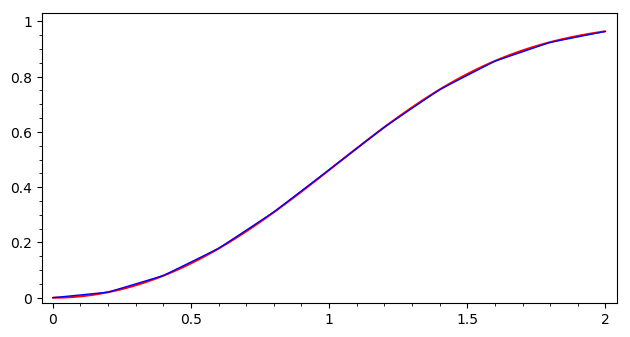

In [7]:
tf=2
gsol = implicit_plot(g.real_part()==0,(t,0,tf),(x,0,1.01),color='red')
line(taylor(f,0.,0.,tf,10,3))+gsol

## Método de Runge-Kutta

1. Crea una función que reciba los parámetros $\alpha_\mu$, $\theta_i$ (listas) y $\alpha_{\mu,k}$ (lista de listas), el PVI y $n$ y devuelva la aproximación de la solución por el método de Runge-Kutta.
2. Aplicar 10 pasos del método de Runge-Kutta de cuarto orden al PVI $$x'=t(1-x^2),\quad x(0)=1.$$ Aproximar la solución en distintos valores de $t$ (2, 4, 6) y comparar los resultados obtenidos con el método de Euler y el anterior de Taylor de orden 3. Además, comparar los resultados con el comando de Sage desolve_rk4.

In [8]:
def RungeKutta(f,t0,x0,t1,n,theta,alpha,alphamu):
    # Método de Runge-Kutta
    # f campo
    # t0,x0 condición inicial
    # t1 tiempo final
    # n número de pasos del método
    tk = (n+1)*[0]
    xk = (n+1)*[0]
    h = (t1-t0)/n
    tk[0] = t0
    xk[0] = x0
    m = len(alphamu)
    tau = (m+1)*[0]
    eta = (m+1)*[0]
    for k in [0..n-1]:
        tk[k+1] = tk[k] + h
        # tau = ti + theta_mu h, mu = 0...m
        for mu in [0..m]:
            tau[mu] = tk[k] + theta[mu]*h
        # eta = xi + h * (sum alpha_mu_k f(theta_mu,eta_mu)  )
        eta[0] = xk[k]
        for mu in [1..m]:
            eta[mu] = xk[k] + h*\
            sum([alphamu[mu-1][i]*f(t=tau[i],x=eta[i]) for i in [0 .. mu-1]])
        # phi = sum alpha_mu f(tau_mu,eta_mu), mu entre 0 y m
        phi = sum([alpha[mu]*f(t=tau[mu],x=eta[mu]) for mu in [0 .. m]])
        xk[k+1] = xk[k] + h * phi
    return zip(tk,xk)

In [9]:
# 2
var('t,x')
f = t*(1-x^2)
t0=0
x0=0
t1=2

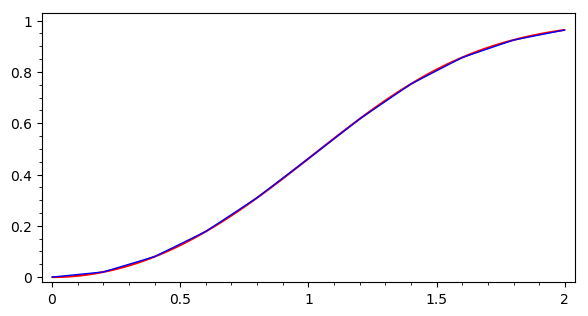

In [10]:
theta = [0,1/2,1/2,1]
alpha = [1/6,1/3,1/3,1/6]
alphamu = [ [1/2],[0,1/2],[0,0,1] ]
line(RungeKutta(f,0.,0.,2.,10,theta,alpha,alphamu))+gsol


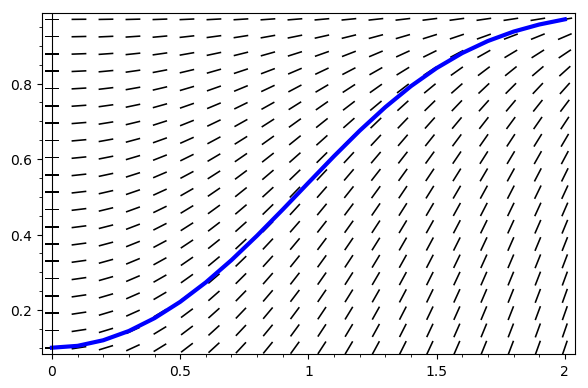

In [11]:
desolve_rk4(f(t,x),x,ics=[0,.1],ivar=t,output='slope_field',end_points=[2],thickness=3)

## Sistemas de ecuaciones

Aplicar  los métodos de Taylor y Runge-Kutta (de cuarto orden) al problema de valor inicial
$$x'=-y,\quad y'=x,\quad x(0)=1,\quad y(0)=0.$$

In [12]:
X(x,y) = [-y,x]

In [13]:
@cached_function
def DT(X,n):
    if n==0:
        return X
    return (DT(X,n-1).diff()*X)

In [14]:
def elemento_serie(X,x0,h,j):
    # Devuelve un sumando del desarrollo en serie
    return DT(X,j)(*x0)*h^j/factorial(j+1)

def taylor(X,x0,t1,n,m):
    # Método de Taylor de orden m
    # f campo
    # x0 condición inicial
    # t1 tiempo final
    # n número de pasos del método
    xk = (n+1)*[(0.,0.)]
    h = t1/n
    xk[0] = vector(RDF,x0)
    for k in [0..n-1]:
        # phi f0 + f1*h/2! + f2*h^2/3! ... f(m-1)*h^(m-1)/m!
        phi = sum([ elemento_serie(X,xk[k],h,j) for j in [0..(m-1)]])
        xk[k+1] = xk[k] + h * phi
    return xk

In [15]:
X(x,y) = [-x^3-y,-y^3+x+y/10]

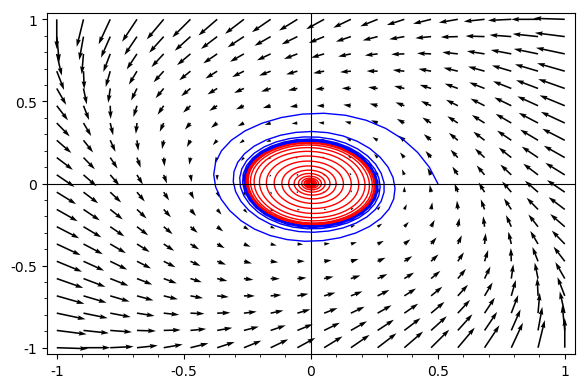

In [16]:
line(taylor(-X,[0.1,0],60,500,3),color='red')+line(taylor(X,[0.1,0],60,500,3),color='red')+line(taylor(X,[0.5,0],40,200,3))+plot_vector_field(X(x,y),(x,-1,1),(y,-1,1))

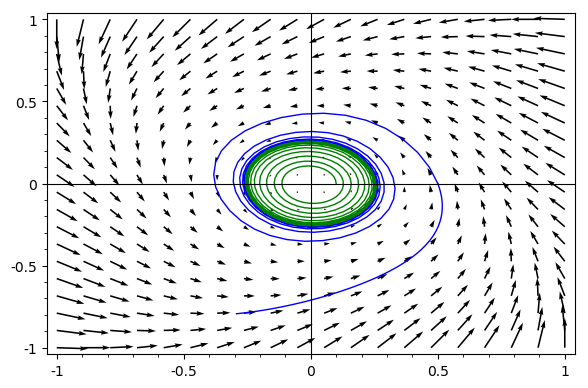

In [17]:
line(taylor(-X,[0.5,0],2,100,3))+line(taylor(X,[0.5,0],40,200,3))\
+plot_vector_field(X(x,y),(x,-1,1),(y,-1,1))\
+line(taylor(X,[0.1,0],80,400,3),color='green')

In [18]:
def RungeKutta_sistemas(X,x0,t1,n,alpha,alphamu):
    # Método de Runge-Kutta
    # f campo
    # x0 condición inicial
    # t1 tiempo final
    # n número de pasos del método
    xk = (n+1)*[(0,0)]
    h = t1/n
    xk[0] = vector(x0)
    m = len(alphamu)
    tau = (m+1)*[0]
    eta = (m+1)*[(0,0)]
    for k in [0..n-1]:
        # eta = xi + h * (sum alpha_mu_k f(theta_mu,eta_mu)  )
        eta[0] = xk[k]
        for mu in [1..m]:
            eta[mu] = xk[k] + h*\
            sum([alphamu[mu-1][i]*X(*eta[i]) for i in [0 .. mu-1]])
        # phi = sum alpha_mu f(tau_mu,eta_mu), mu entre 0 y m
        phi = sum([alpha[mu]*X(*eta[mu]) for mu in [0 .. m]])
        xk[k+1] = xk[k] + h * phi
    return xk

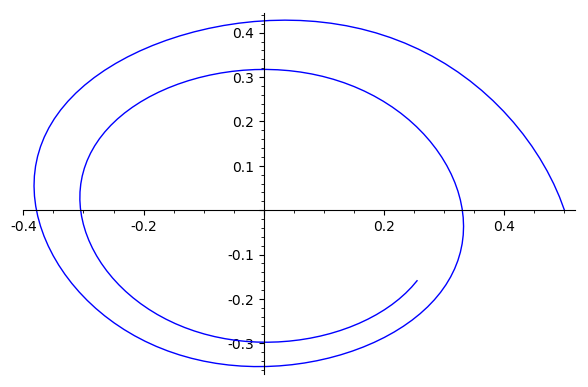

In [19]:
alpha = [1/6,1/3,1/3,1/6]
alphamu = [ [1/2],[0,1/2],[0,0,1] ]
line(RungeKutta_sistemas(X,[0.5,0],12,200,alpha,alphamu)) 

<a id="multipaso"></a>

# Métodos multipaso. Estabilidad.

## Método de Adams-Bashforth

Comencemos calculando los coeficientes del método de Adam-Bashford.

In [28]:
@cached_function #caché para guardar el resultado y evaluarlo más rápido
def beta_Adams_Bashforth(k,j):
    # Coeficiente j del método de Adams-Bashforth de k-pasos.
    lj(t)=prod([(t-i)/(j-i) for i in [0..j-1]+[j+1..k-1]])    
    return lj.integral(t,k-1,k)

1. Aplicar 40 pasos del método de Adams-Bashforth de 3 pasos al problema de valor inicial $$x' = t(1-x^2),\quad x(0)=0,$$ para aproximar el valor en $t=4$. Utilizar algún método de tercer orden para calcular las aproximaciones iniciales.  
2. Aplicar 40 pasos del método predictor-corrector, usando Adams-Bashforth de 3 pasos como predictor y el método de Adams-Moulton como corrector, al problema de valor inicial $$x' = t(1-x^2),\quad x(0)=0,$$ para aproximar el valor en $t=4$. Utilizar algún método de tercer orden para calcular las aproximaciones iniciales.  
3. Estimar los errores en cada paso en la aplicación del método anterior.

In [22]:
@cached_function
def der_total(f,n):
    if n==0:
        return f
    return ( der_total(f,n-1).diff(t) + der_total(f,n-1).diff(x) * f ).expand()

In [23]:
def elemento_serie(f,t0,x0,h,j):
    # Devuelve un sumando del desarrollo en serie
    return der_total(f,j)(t=t0,x=x0)*h^j/factorial(j+1)

def taylor(f,t0,x0,t1,n,m):
    # Método de Taylor de orden m
    # f campo
    # t0,x0 condición inicial
    # t1 tiempo final
    # n número de pasos del método
    tk = (n+1)*[0]
    xk = (n+1)*[0]
    h = (t1-t0)/n
    tk[0] = t0
    xk[0] = x0
    for k in [0..n-1]:
        tk[k+1] = tk[k] + h
        # phi f0 + f1*h/2! + f2*h^2/3! ... f(m-1)*h^(m-1)/m!
        phi = sum([ elemento_serie(f,tk[k],xk[k],h,j) for j in [0..(m-1)]])
        xk[k+1] = xk[k] + h * phi
    return zip(tk,xk)

In [49]:
f(t,x)=t*(1-x^2)
t0 = 0.
tf = 4.
n = 40
k = 3
h = (tf-t0)/n

In [50]:
# Otro ejemplo
g(t,x)=t-x^2
t0g = 1.
tfg = 5.
ng = 40
kg = 2
hg = 1

In [51]:
tk,xk = zip(*taylor(f,0.,0.,(k-1)*h,k-1,k))
tk,xk

((0.000000000000000, 0.100000000000000, 0.200000000000000),
 (0.000000000000000, 0.00500000000000000, 0.0199982917249994))

In [52]:
tkg,xkg = zip(*taylor(g,0.,0.,(kg-1)*hg,kg-1,kg))
tkg,xkg

((0.000000000000000, 1.00000000000000), (0.000000000000000, 0.500000000000000))

In [53]:
def Adams_Bashforth(f,t0,x0,t1,n,k):
    # Método de Adams-Bashforth de k pasos
    # f campo
    # t0,x0 condición inicial
    # t1 tiempo final
    tk = list(t0)
    xk = list(x0)
    h = (t1-t0[0])/n
    for _ in [0..n-k]:
        # print( xk[-1],xk[-2],xk[-3],beta_Adams_Bashforth(k,0),beta_Adams_Bashforth(k,1),beta_Adams_Bashforth(k,2))
        xk += [ xk[-1] + h*sum([ beta_Adams_Bashforth(k,j)*f(tk[j-k],xk[j-k])  for j in [0 .. k-1] ])  ]
        tk += [ tk[-1] + h ]
    return zip(tk,xk)

In [59]:
list(Adams_Bashforth(g,tkg,xkg,5.,40,2))

[(0.000000000000000, 0.000000000000000),
 (1.00000000000000, 0.500000000000000),
 (1.12500000000000, 0.640625000000000),
 (1.25000000000000, 0.727737426757812),
 (1.37500000000000, 0.818149620739860),
 (1.50000000000000, 0.905430580524469),
 (1.62500000000000, 0.988865280116353),
 (1.75000000000000, 1.06769283695948),
 (1.87500000000000, 1.14162724695547),
 (2.00000000000000, 1.21069160202555),
 (2.12500000000000, 1.27512849610965),
 (2.25000000000000, 1.33531075301231),
 (2.37500000000000, 1.39167251927856),
 (2.50000000000000, 1.44465986955137),
 (2.62500000000000, 1.49469899360378),
 (2.75000000000000, 1.54217817449451),
 (2.87500000000000, 1.58743970673317),
 (3.00000000000000, 1.63077839762992),
 (3.12500000000000, 1.67244403987891),
 (3.25000000000000, 1.71264597629122),
 (3.37500000000000, 1.75155849792915),
 (3.50000000000000, 1.78932629324809),
 (3.62500000000000, 1.82606950703190),
 (3.75000000000000, 1.86188819766776),
 (3.87500000000000, 1.89686612658453),
 (4.0000000000000

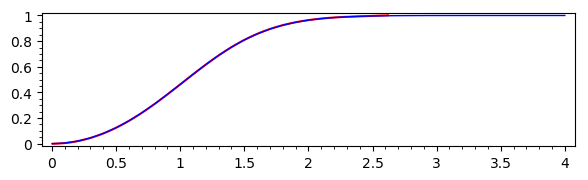

In [39]:
g=integral(1/(1-x^2),x)+I*pi/2-integral(t,t)
gsol = implicit_plot(g.real_part()==0,(t,t0,tf),(x,0,1.002),color='red')
line(Adams_Bashforth(f,tk,xk,tf,n,3)) + gsol  

## Método de Adams-Moulton

In [110]:
@cached_function #caché para guardar el resultado y evaluarlo más rápido
def beta_Adams_Moulton(k,j):
    # Coeficiente j del método de Adams-Moulton de k-pasos.
    lj(t)=prod([(t-i)/(j-i) for i in [0..j-1]+[j+1..k]])    
    return lj.integral(t,k-1,k)

In [111]:
def Adams_Moulton(f,t0,x0,t1,n,k):
    # Método de Adams-Moulton de k pasos
    # f campo
    # t0,x0 condición inicial
    # t1 tiempo final
    tk = list(t0)
    xk = list(x0)
    h = (t1-t0[0])/n
    for _ in [0..n-k]: # n-k porque estamos restando los k pasos que hicimos con Taylor
        # print( xk[-1],xk[-2],xk[-3],beta_Adams_Bashforth(k,0),beta_Adams_Bashforth(k,1),beta_Adams_Bashforth(k,2))
        xk += [ xk[-1] + h*sum([ beta_Adams_Moulton(k,j)*f(tk[j-k],xk[j-k])  for j in [0 .. k] ])  ]
        tk += [ tk[-1] + h ]
    return zip(tk,xk)

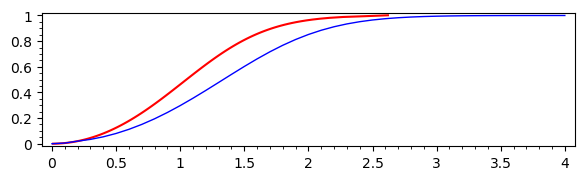

In [112]:
g=integral(1/(1-x^2),x)+I*pi/2-integral(t,t)
gsol = implicit_plot(g.real_part()==0,(t,t0,tf),(x,0,1.002),color='red')
line(Adams_Moulton(f,tk,xk,tf,n,3)) + gsol 

## Método Predictor-Corrector

In [113]:
def predictor_corrector(f,beta_predictor,beta_corrector,t0,x0,t1,n,k):
    tk = list(t0)
    xk = list(x0)
    h = (t1-t0[0])/n
    for _ in [0..n-k]:
        x_pred = xk[-1] + h*sum([ beta_predictor(k,j)*f(tk[j-k],xk[j-k]) for j in [0..k-1]])
        xk += [ xk[-1] + h*beta_corrector(k-1,k-1)*f(tk[-1],x_pred) +\
               + h*sum(beta_corrector(k-1,j)*f(tk[j-k],xk[j-k]) for j in [0..k-2])]
        tk += [ tk[-1] + h ]
    return zip(tk, xk)

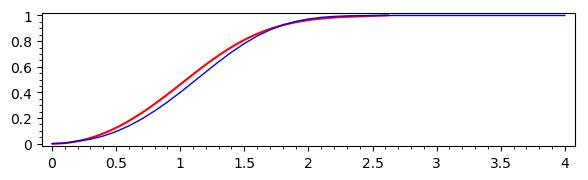

In [114]:
g=integral(1/(1-x^2),x)+I*pi/2-integral(t,t)
gsol = implicit_plot(g.real_part()==0,(t,t0,tf),(x,0,1.002),color='red')
line(predictor_corrector(f,beta_Adams_Bashforth, beta_Adams_Moulton,tk,xk,tf,n,3)) + gsol 

### Estimación de errores del predictor-corrector

In [115]:
# El método de Adam-Bashford es explícito(predictor) y
# el método de Adam-Moulton es implícito(corrector)
# El método predictor-corrector es explícito, parecido al método de
# Heun, que aproxima por Euler
def error_explicito(tx_metodo, x_sol, h):
    tau = []
    for (t,x_metodo) in tx_metodo:
        tau += [(x_sol(t) - x_metodo) / h]
    return tau

In [120]:
sol_exacta(t) = (exp(t^2)-1)/(1+exp(t^2))
tx_metodo = predictor_corrector(f,beta_Adams_Bashforth, beta_Adams_Moulton,tk,xk,tf,n,3)
error_explicito(tx_metodo, sol_exacta, h)

[0,
 -4.16662500586987e-7,
 -9.57965068448113e-6,
 0.0998838699835141,
 0.199149307489777,
 0.296446206088441,
 0.389278311302489,
 0.473716465709927,
 0.544389703297549,
 0.594877193780073,
 0.618627238971065,
 0.610391796199336,
 0.567923765135784,
 0.493421784761586,
 0.394087193699414,
 0.281332739856514,
 0.168657732040679,
 0.0687765233377324,
 -0.00905266741592414,
 -0.0606148366507453,
 -0.0868147282858267,
 -0.0924222912565620,
 -0.0841182688945374,
 -0.0685844801252089,
 -0.0511766927932034,
 -0.0353637965516074,
 -0.0228110664747438,
 -0.0138355132664447,
 -0.00796364504225600,
 -0.00440933675783683,
 -0.00239248121430724,
 -0.00129708769545323,
 -0.000709242689678202,
 -0.000386614457610346,
 -0.000203459840437681,
 -0.0000993292436834992,
 -0.0000438129474189530,
 -0.0000181517388242458,
 -8.65537569394448e-6,
 -5.74904970740420e-6,
 -4.15374860063267e-6]

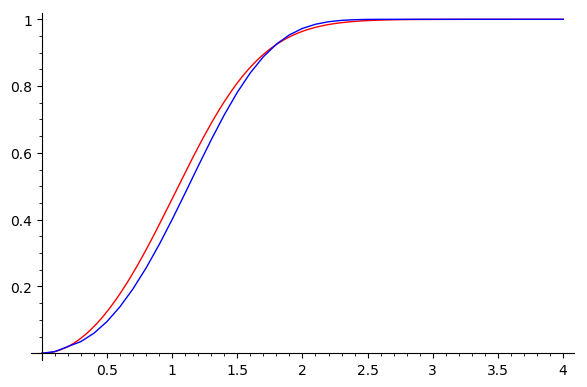

In [121]:
plot(sol_exacta, (t,0,4),color='red') + \
line(predictor_corrector(f,beta_Adams_Bashforth, beta_Adams_Moulton,tk,xk,tf,n,3))

## Estabilidad absoluta

Consideremos el método de Taylor. Recordemos que el método es absolutamente estable para un valor $\bar h$ si al sustituir en la ecuación test, se obtiene que la sucesión $x_n$ definida por el método es convergente. Es fácil comprobar que en el método de Taylor la sucesión que define el método para es de la forma $x_{n+1}=x_n P(\bar h)$, donde
$$
P(x)=1+x+\frac{x^2}{2!}+\ldots+\frac{x^p}{p!}.
$$
Luego el método será estable siempre que $|P(\bar h)|<1$.

In [123]:
# Estabilidad del método de Taylor
var('x,y,H')
def P(n,H):
    # Caculamos el polinomio P
    return 1+sum([H^k/factorial(k) for k in [1..n]])
def ET(x,y,n):
    # Calculamos el módulo de P(h) 
    cc = P(n,x+I*y).expand().coefficients(I)
    return cc[0][0]^2+cc[1][0]^2

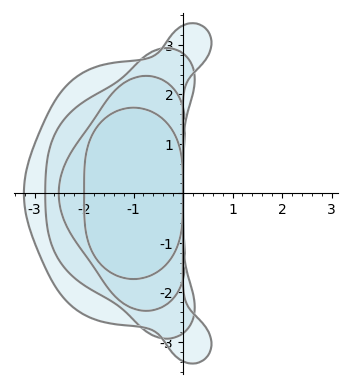

In [124]:
# Regiones de estabilidad absoluta para el método de Taylor de órden 2,3,4,5
R2=region_plot( ET(x,y,2)<1,(x,-3.3,3),(y,-3.5,3.5), incol='lightblue', bordercol='gray',alpha=0.3) 
R3=region_plot( ET(x,y,3)<1,(x,-3.3,3),(y,-3.5,3.5), incol='lightblue', bordercol='gray',alpha=0.3) 
R4=region_plot( ET(x,y,4)<1,(x,-3.3,3),(y,-3.5,3.5), incol='lightblue', bordercol='gray',alpha=0.3) 
R5=region_plot( ET(x,y,5)<1,(x,-3.3,3),(y,-3.5,3.5), incol='lightblue', bordercol='gray',alpha=0.3) 
R2+R3+R4+R5

1. Aplicar el método de Taylor al PVI
$$x'=ax+by,\quad y'=-bx+ay,\quad x(0)=1,\quad y(0)=0,$$
eligiendo los coeficientes $a,b$ de modo que:

  a) La solución del problema de valor inicial sea convergente al $(0,0)$ y el método de Taylor de quinto orden también.

  b) La solución del problema de valor inicial sea convergente al $(0,0)$ y el método de Taylor de quinto orden no.

  c) La solución del problema de valor inicial no sea convergente $(0,0)$ y el método de Taylor de quinto orden tampoco.

  d) La solución del problema de valor inicial no sea convergente al $(0,0)$ y el método de Taylor de quinto orden sí.

# Problemas de valores frontera

## Métodos de tiro

Consideremos el PVF 
$$-u''(t)+u(t)=t,\quad u(0)=u(1)=0.$$
Vamos a aproximar la solución aplicando métodos de tiro.

In [42]:
# Consideramos nuestra ecuación -u''(t) +c (t) u(t)=f(t)
var('u,v,t')
c(t)=1
f(t)=t
# Lo tenemos que escribir en forma de sistema u'=v, v'=c*u-f
eqns=[v,c(t)*u-f(t)]

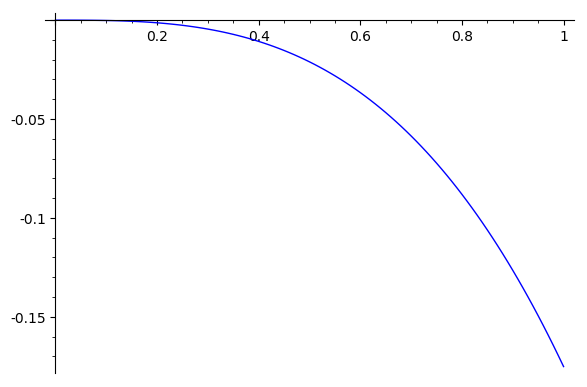

In [43]:
# Resolvemos el PVI u(0)=0, u'(0)=0
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,0],ivar=t,end_points=1,step=0.01)
# Sólo necesitamos el valor aproximado de u(1)
line([(ti,ui) for ti,ui,vi in P])

Sea $u(t,v0)$ la solución de la ecuación diferencial determinada por las condiciones iniciales $u(0,v0)=0$, $u'(0,v0)=v0$. Definimos $\phi(v0)=u(1,v0)$. Buscamos $v0$ tal que $\phi(v0)=0$, para lo que aplicaremos el método de la secante. Tomamos las condiciones iniciales $\phi(0)$ y $\phi(1)$.

In [44]:
phi0=P[-1][1]
phi0

-0.1752011935160229

In [45]:
# Resolvemos el PVI u(0)=0, u'(0)=1
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,1],ivar=t,end_points=1,step=0.01)
# Sólo necesitamos el valor aproximado de u(1)
phi1=P[-1][1]
phi1

1.000000000000001

Ahora aplicamos un paso del método de la secante. Como el problema es lineal, sabemos que esto nos da la solución. 

In [46]:
# Calculamos x2 (que sabemos que es la condición inicial que queremos por ser el problema lineal)
v2 = (0*phi1-1*phi0)/(phi1-phi0)
# Resolvemos el sistema para esa ecuación inicial y representamos la solución
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,v2],ivar=t,end_points=1,step=0.01)

In [47]:
P[-1][1]

-1.47017814589034e-16

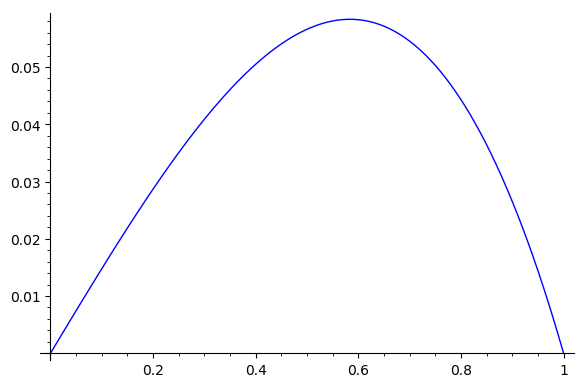

In [48]:
line([ [ti,ui] for ti,ui,vi in P])

### Ejercicios

1. Aplicar el método anterior al PVF $$-u''(t) + u(t)=\cos(t),\quad u(0)=0,\ u(1)=1.$$
2. Aplicar el método anterior al PVF $$-u''(t) + u(t) e^{u(t)/10} =t,\quad u(0)=0,\ u(1)=0.$$
3. Resolver el problema anterior aplicando el método de Taylor.

In [10]:
# 1
var('t,u,v')
eqns=[v,u-cos(t)]

In [125]:
# 2
var('t,u,v')
eqns=[v,exp(u/10)*u-t]

In [11]:
def phi(v0,eqns):
    P = desolve_system_rk4(eqns,[u,v],ics=[0,0,v0],ivar=t,end_points=1,step=0.01)
    return P[-1][1]

In [12]:
x0 = 0.
x1 = 1.
x2 = (x0*phi(x1,eqns)-x1*phi(x0,eqns))/(phi(x1,eqns)-phi(x0,eqns))
x2

0.426641129345256

In [13]:
phi(x2,eqns)

-1.31405303305243e-16

In [129]:
x3 = (x1*phi(x2,eqns)-x2*phi(x1,eqns))/(phi(x2,eqns)-phi(x1,eqns))
x3,phi(x3,eqns)

(0.149003311455179, -9.44211293027984e-06)

In [130]:
# 3
var('t,u,v,u1,v1')
eqnsp=[v,exp(u/10)*u-t,v1,(exp(u/10)+u*exp(u/10)/10)*u1]
def phip(v0,eqnsp):
    P = desolve_system_rk4(eqnsp,[u,v,u1,v1],ics=[0,0,v0,0,1],ivar=t,end_points=1,step=0.01)
    return P[-1][1],P[-1][3]

In [131]:
v0 = 0
phi0,phip0 = phip(v0,eqnsp)
phi0,phip0

(-0.1751480655585013, 1.173940125122598)

In [132]:
v0 = v0 - phi0/phip0
phi(v0,eqns)

0.000218224494136432

In [133]:
phi0,phip0 = phip(v0,eqnsp)
v0 = v0 - phi0/phip0
phi(v0,eqns)

3.40915273008141e-10

In [134]:
# 3
def NR(v0):
    var('t,u,v,u1,v1')
    eqnsp=[v,exp(u/10)*u-t,v1,(exp(u/10)+u*exp(u/10)/10)*u1]
    P = desolve_system_rk4(eqnsp,[u,v,u1,v1],ics=[0,0,v0,0,1],ivar=t,end_points=1,step=0.01)
    return v0-P[-1][1]/P[-1][3]

In [135]:
v0 = 0.
NR(NR(v0))

0.14901133481701218

In [136]:
def NR(v0):
    var('t,u,v,u1,v1')
    eqns=[v,exp(u/10)*u-t,v1,(u*exp(u/10)/10+exp(u/10))*u1]
    P = desolve_system_rk4(eqns,[u,v,u1,v1],ics=[0,0,v0,0,1],ivar=t,end_points=1,step=0.01)
    phi_v0  = P[-1][1]
    phip_v0 = P[-1][3]
    return v0-phi_v0/phip_v0

In [137]:
Taylor(0), Taylor(Taylor(0))

NameError: name 'Taylor' is not defined

In [138]:
var('t,u,v')
eqns=[v,exp(u/10)*u-t]
vf = Taylor(Taylor(0))
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,vf],ivar=t,end_points=1,step=0.01)
P[-1][1]

NameError: name 'Taylor' is not defined

## Diferencias finitas

Consideremos de nuevo el PVF 
$$-u''(t)+u(t)=t,\quad u(0)=u(1)=0.$$
Vamos a aplicar ahora el método de las diferencias finitas.

In [ ]:
# Consideramos nuestra ecuación -u''(t) +c (t) u(t)=f(t)
var('u,v,t')
c(t)=1
f(t)=t

In [ ]:
# Función que define los coeficientes del sistema
def a(i,j,c,h):
    if i==j:
        return 2+c(i*h)*h^2
    if abs(i-j)==1:
        return -1
    else:
        return 0

In [ ]:
# Planteamos el sistema y lo resolvemos
N=4
h=1/(N+1)
A=matrix(QQ,[[a(i,j,c,h) for j in [1..N]] for i in [1..N]])
F=vector(QQ,[f(i*h)*h^2 for i in [1..N]])
ui=A.solve_right(F)
line(zip([i*h for i in [0..N+1]],[0]+list(ui)+[0]),color='red')

### Ejercicios

1. Aplicar el método de las diferencias finitas para resolver el PVF $$-u''(t)+t u(t)=2t-1,\quad u(0)=u(1)=0.$$

In [139]:
# Consideramos nuestra ecuación -u''(t) +c (t) u(t)=f(t)
var('u,v,t')
c(t)=1
f(t)=t
# Planteamos el sistema y lo resolvemos
N=4
h=1/(N+1)
A=matrix(QQ,[[a(i,j,c,h) for j in [1..N]] for i in [1..N]])
F=vector(QQ,[f(i*h)*h^2 for i in [1..N]])
ui=A.solve_right(F)
d1 = line(zip([i*h for i in [0..N+1]],[0]+list(ui)+[0]),color='red')

In [140]:
# Lo tenemos que escribir en forma de sistema u'=v, v'=c*u-f
eqns=[v,c(t)*u-f(t)]
def phi(v0,eqns):
    P = desolve_system_rk4(eqns,[u,v],ics=[0,0,v0],ivar=t,end_points=1,step=0.01)
    return P[-1][1]
v0 = 0
v1 = 1
v2 = (v0*phi(v1,eqns)-v1*phi(v0,eqns))/(phi(v1,eqns)-phi(v0,eqns))
P = desolve_system_rk4(eqns,[u,v],ics=[0,0,v2],ivar=t,end_points=1,step=0.01)
d2 = line([(ti,ui) for ti,ui,vi in P],color='green')

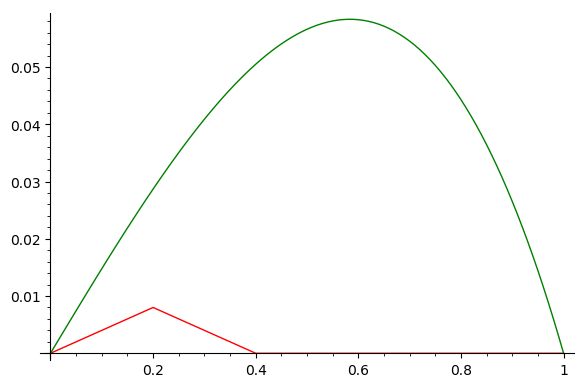

In [141]:
d1+d2

In [168]:
A = ((-55,27),(27,-56))
b = vector((2,2))
matrix(A),b
B = matrix(A).inverse()
B*b

(-166/2351, -164/2351)

## Ecuación del calor

Vamos a utilizar el método implícito para resolver la ecuación del calor.

In [3]:
def un_paso(u,at,bt,s):
    # Rellena la matriz
    # at,bt son a(t+k) y b(t+k), donde t es el tiempo correspondiente a u
    n=len(u)-1
    return [at] + [s*u[i-1]+(1-2*s)*u[i]+s*u[i+1] for i in [1..n-1] ] + [bt]

In [4]:
def diferencias_finitas(g,a,b,h,k,M):
    u=[g(i) for i in [0,h..1]]
    L=[u]
    for j in [1..M]:
        u=un_paso(u,a(j*k),b(j*k),k/h^2)
        L+=[u]
    return L

In [5]:
# Fijamos las condiciones fronteras 
g(x)=1.0*x*(1-x) #función positiva, y vale 0 en los bordes
a(t)=0
b(t)=1-1/(t+1) #la Temperatura del extremo derecho se acerca a 1
# Definimos los puntos de la malla
N=10
M=500
h=1.0/N #10 divisiones en el tiempo
k=1.0/N^2/3 #100 divisiones en el espacio

In [6]:
L=diferencias_finitas(g,a,b,h,k,M)
graficas0=[line(zip([0,h..1],u),ymin=0,ymax=1) for u in L[0:-1:5]]
# Pinto de 5 en 5 los fotogramas porque SAGE tiene un error de lentitud
animacion=animate(graficas0) #Lista de todas la gráficas

Animation with 100 frames
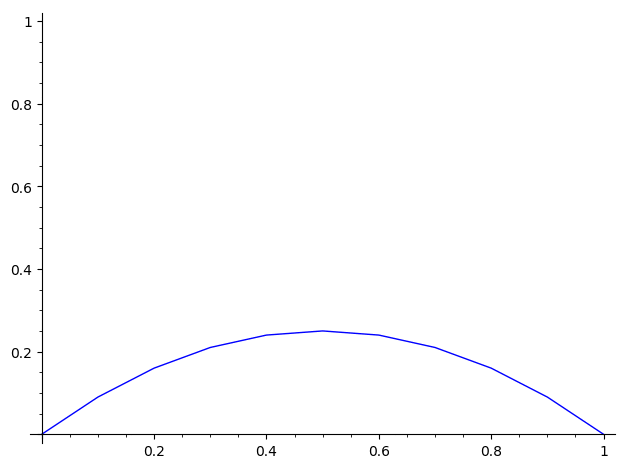

In [7]:
animacion.show()

### Ejercicios
1. Utilizar las condiciones de frontera $a(t) = 0$, $b(t) = 0$, $g(t) = x(1-x)$. ¿Qué ocurre con la temperatura?
2. Cambiar los valores de N y M y ver qué le ocurre a las soluciones.

In [8]:
g(x) = 1.0*x*(1-x)
a(t)= 0
b(t)= 0
N=10
M=500
h=1.0/N 
k=1.0/N^2/3
L=diferencias_finitas(g,a,b,h,k,M)
graficas1=[line(zip([0,h..1],u),ymin=0,ymax=1) for u in L[0:-1:5]]

Animation with 100 frames
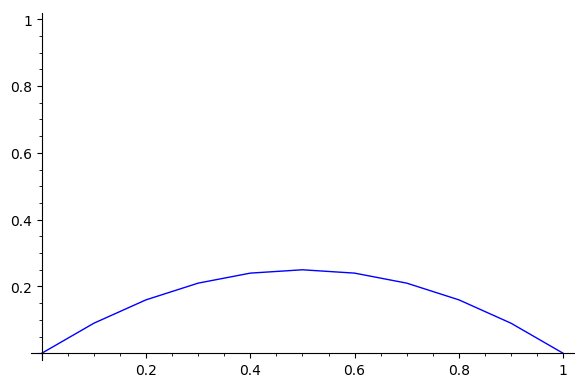

In [9]:
animacion=animate(graficas0)
animacion.show()

## Problema de Dirichlet

Veamos una aplicación de la resolución del problema de Dirichlet para rellenar huecos en una imagen

$u(0,y)=r(y)=1$

$u(x,0)=g(x)=1$

$u(x,1)=a(x)=x$

$u(1,y)=b(y)=y$

$h = 1/3$, luego $n=2$

In [61]:
u11, u12, u21, u22 = var('u11 u12 u21 u22')

In [84]:
r(y)=1
g(x)=1
a(x)=x
b(y)=y
n=3

In [105]:
mesh = [[0 for j in range(n+1)] for i in range(n+1)]
for j in range(n+1):
    mesh[0][j] = r(j)
    mesh[n][j] = b(j)
for i in range(n+1):
    mesh[i][0] = g(i)
    mesh[i][n] = a(i)
mesh[1][1] = u11
mesh[1][2] = u12
mesh[2][1] = u21
mesh[2][2] = u22
for linea in mesh:
    print(linea)

[1, 1, 1, 0]
[1, u11, u12, 1]
[1, u21, u22, 2]
[1, 1, 2, 3]


In [101]:
def eq_dirichlet(mesh, i, j):
    return 4*mesh[i][j]-mesh[i-1][j]-mesh[i+1][j]-mesh[i][j-1]-mesh[i][j+1]

eqns = [eq_dirichlet(mesh, i, j) for i in range(1,3) for j in range(1,3)]
eqns

[4*u11 - u12 - u21 - 2,
 -u11 + 4*u12 - u22 - 2,
 -u11 + 4*u21 - u22 - 2,
 -u12 - u21 + 4*u22 - 4]

In [102]:
solve(eqns, u11, u12, u21, u22)

[[u11 == (13/12), u12 == (7/6), u21 == (7/6), u22 == (19/12)]]